# sparselandtools notebook

This notebook gives you some examples on how to use sparselandtools. You can run each cell independently. 

## Dictionaries

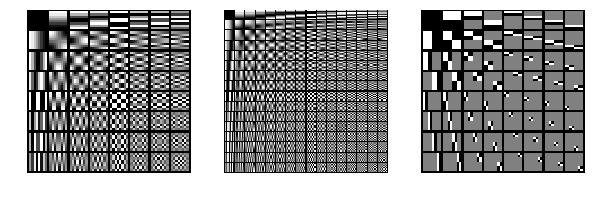

In [10]:
from sparselandtools.dictionaries import DCTDictionary, HaarDictionary
import matplotlib.pyplot as plt

# unitary DCT-dictionary (8^2 x 8^2)
d1 = DCTDictionary(8, 8)

# overcomplete DCT-dictionary (8^2 x 16^2)
d2 = DCTDictionary(8, 16)

# unitary Haar-dictionary (8^2 x 8^2)
d3 = HaarDictionary(8, 8)

plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(d1.to_img(), cmap='gray')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(d2.to_img(), cmap='gray')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(d3.to_img(), cmap='gray')
plt.show()

In [11]:
from sparselandtools.dictionaries import DCTDictionary, HaarDictionary

d1 = DCTDictionary(8, 11)
print("DCT 64x121 - Mutual Coherence: %s" % d1.mutual_coherence())
print("DCT 64x121 - is unitary?: %s" % d1.is_unitary())

d2 = HaarDictionary(8, 8)
print("Unitary Haar 64x64 - Mutual Coherence = 0?: %s" % np.isclose(d2.mutual_coherence(), 0))
print("Unitary Haar 64x64 - is unitary?: %s" % d2.is_unitary())

DCT 64x121 - Mutual Coherence: 0.5313241307124397
DCT 64x121 - is unitary?: False
Unitary Haar 64x64 - Mutual Coherence = 0?: True
Unitary Haar 64x64 - is unitary?: True


## Simple Signal Denoising with Matching Pursuit

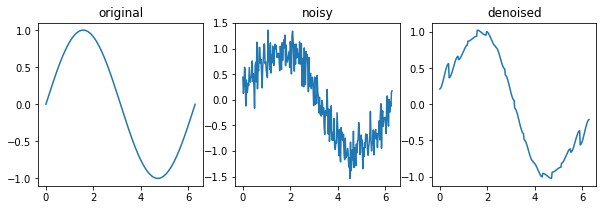

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sparselandtools.pursuits import MatchingPursuit
from sparselandtools.dictionaries import DCTDictionary 

# sine signal
x = np.linspace(0, 2*np.pi, 256)
y = np.sin(x)

# make noisy
sigma = 0.25
np.random.seed(0)
y_noisy = y + sigma*np.random.randn(256)

# find sparse representation of y in a DCT-dictionary using MatchingPursuit
d = DCTDictionary(16, 16)
a = MatchingPursuit(d, sparsity=3).fit(np.array([y_noisy]).T)
z = np.matmul(d.matrix, a)

# plot 
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.title('original')
plt.plot(x, y)
plt.subplot(1, 3, 2)
plt.title('noisy')
plt.plot(x, y_noisy)
plt.subplot(1, 3, 3)
plt.title('denoised')
plt.plot(x, z)

## K-SVD Image Denoising

In [6]:
import matplotlib.pyplot as plt
from sparselandtools.applications.denoising import KSVDImageDenoiser
from sparselandtools.applications.utils import example_image
from sparselandtools.pursuits import MatchingPursuit
from sparselandtools.dictionaries import DCTDictionary

# load input image
original_img = example_image('Barbara')
noisy_img = example_image('Barbara', noise_std=20)

# set patch size
patch_size = 8

# initialize denoiser
initial_dictionary = DCTDictionary(patch_size, 11)
denoiser = KSVDImageDenoiser(initial_dictionary, pursuit=MatchingPursuit)

# denoise image
z, d, a = denoiser.denoise(noisy_img, sigma=20, patch_size=patch_size,
                           n_iter=4, multiplier=0.5, noise_gain=1.075)

/usr/local/lib/python3.6/site-packages/sklearn/feature_extraction/image.py:287: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indexing_strides = arr[slices].strides
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:reconstructing


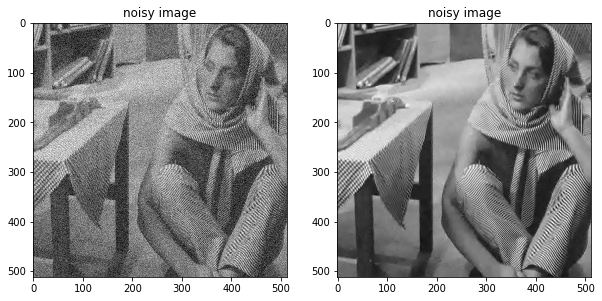

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('noisy image')
plt.imshow(noisy_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('noisy image')
plt.imshow(z, cmap='gray')